In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')
sns.set_palette("viridis")

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:

file_path = 'Mall_Customers.csv' 

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the dataset file is in the same directory.")
    df = pd.DataFrame() 

if not df.empty:
    print("\n--- First 5 Rows of the Dataset ---")
    print(df.head())

    print("\n--- Dataset Information ---")
    df.info()

    print("\n--- Statistical Summary ---")
    print(df.describe())
    
    print("\n--- Missing Values Check ---")
    print(df.isnull().sum())

Dataset loaded successfully.

--- First 5 Rows of the Dataset ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int

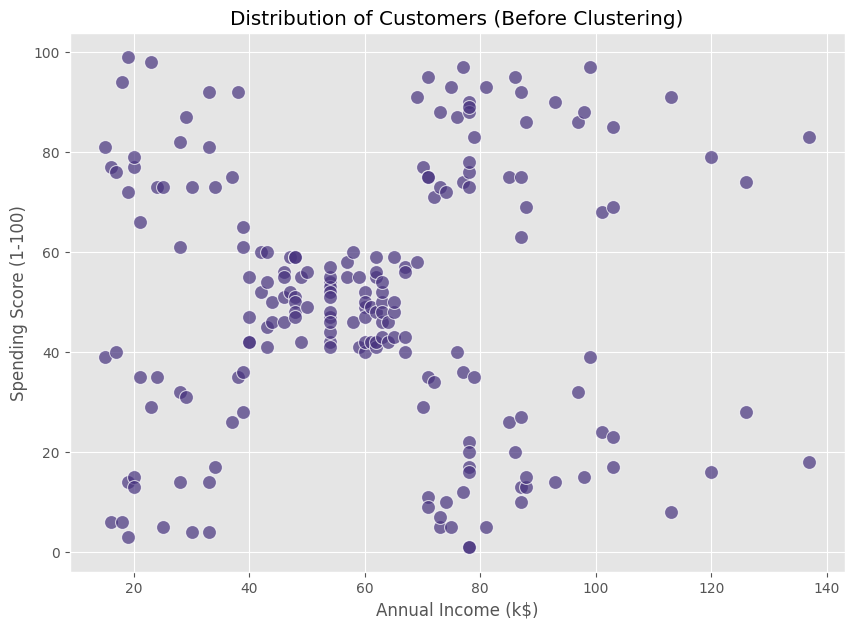

--- Data Scaling Complete ---
First 5 rows of scaled data:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [4]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X[:, 0], y=X[:, 1], s=100, alpha=0.7)
plt.title('Distribution of Customers (Before Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("--- Data Scaling Complete ---")
print("First 5 rows of scaled data:")
print(X_scaled[:5])

In [ ]:
# --- Step 4: Final K-Means Clustering and Visualization ---

# Set the optimal number of clusters found from the Elbow method
optimal_k = 5

# Create the final KMeans model
final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# Fit the model and predict the cluster for each data point
y_kmeans = final_kmeans.fit_predict(X_scaled)

# --- Visualize the results ---
plt.figure(figsize=(12, 8))

# We use the original data (X) for plotting to have meaningful axes
# but the predicted clusters (y_kmeans) are based on the scaled data.
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.9, legend='full')

# Plot the centroids
centroids = final_kmeans.cluster_centers_
# Note: centroids are in the scaled space, so we need to inverse_transform them to plot
original_centroids = scaler.inverse_transform(centroids)
plt.scatter(original_centroids[:, 0], original_centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title(f'Customer Segments (K-Means Clustering with K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

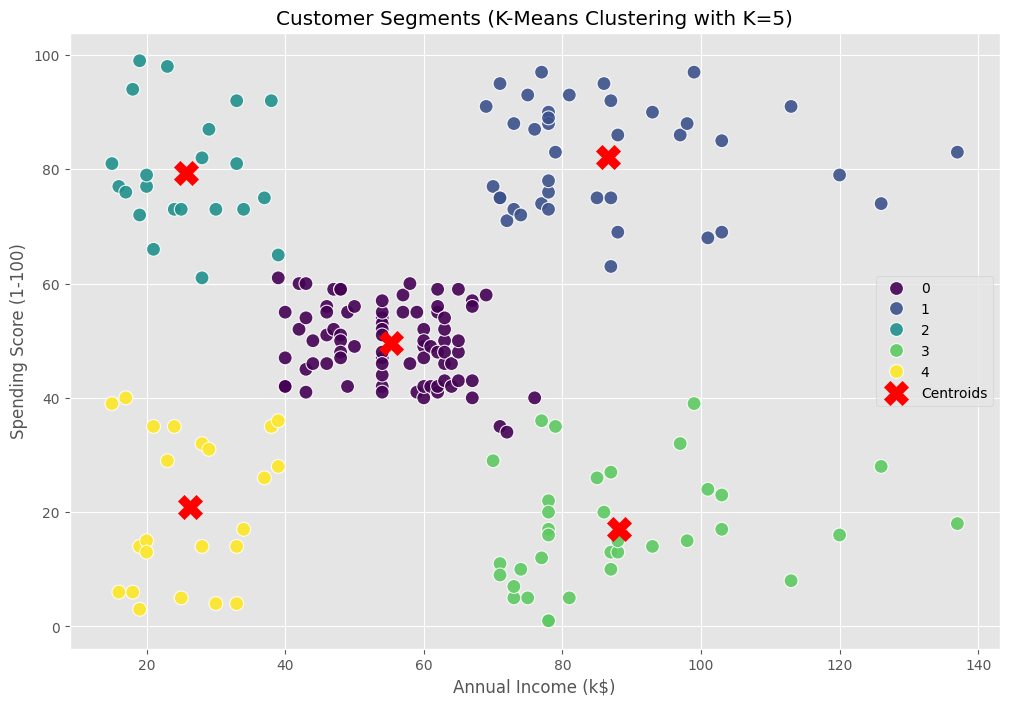

In [5]:

optimal_k = 5

final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

y_kmeans = final_kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 8))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.9, legend='full')

centroids = final_kmeans.cluster_centers_
original_centroids = scaler.inverse_transform(centroids)
plt.scatter(original_centroids[:, 0], original_centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title(f'Customer Segments (K-Means Clustering with K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

--- Generating the Dendrogram ---


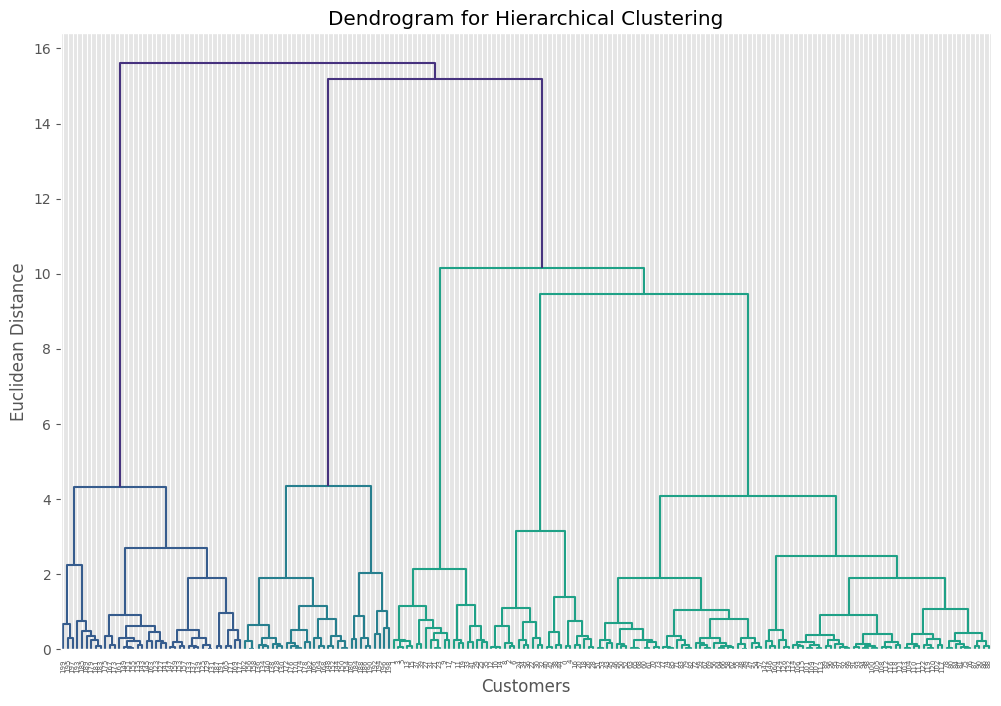

In [6]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

print("--- Generating the Dendrogram ---")

plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y')
plt.show()

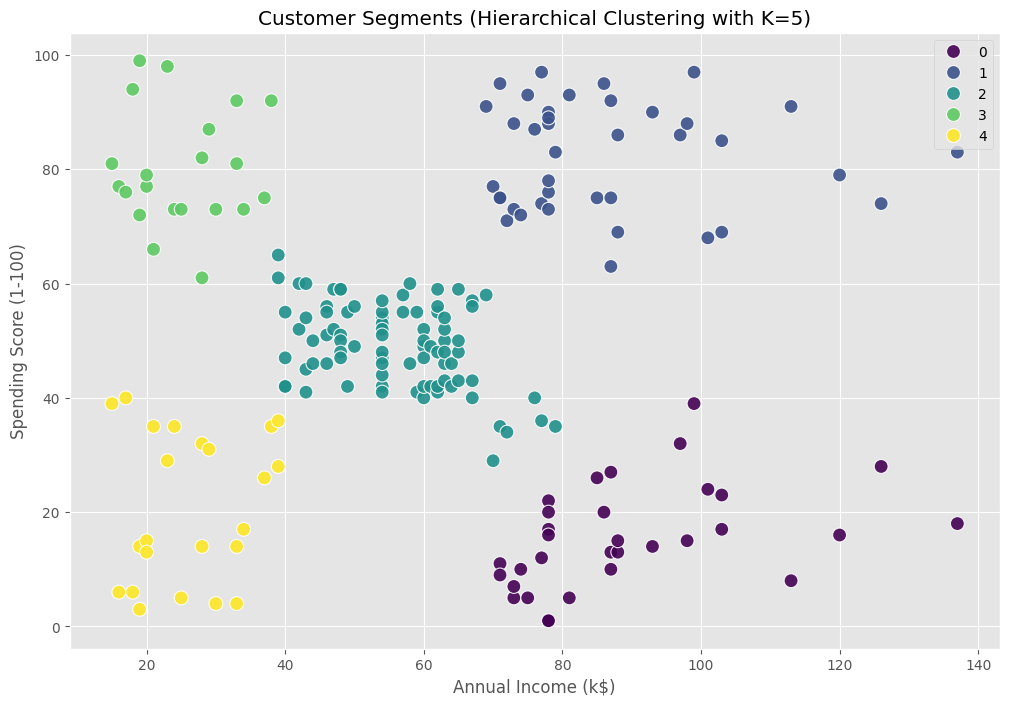

In [7]:

optimal_k_hierarchical = 5

hierarchical_model = AgglomerativeClustering(n_clusters=optimal_k_hierarchical, metric='euclidean', linkage='ward')

y_hierarchical = hierarchical_model.fit_predict(X_scaled)

plt.figure(figsize=(12, 8))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_hierarchical, palette='viridis', s=100, alpha=0.9, legend='full')

plt.title(f'Customer Segments (Hierarchical Clustering with K={optimal_k_hierarchical})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

--- Applying DBSCAN Clustering ---
DBSCAN found 2 clusters.
It also identified 8 noise points (labeled as -1).


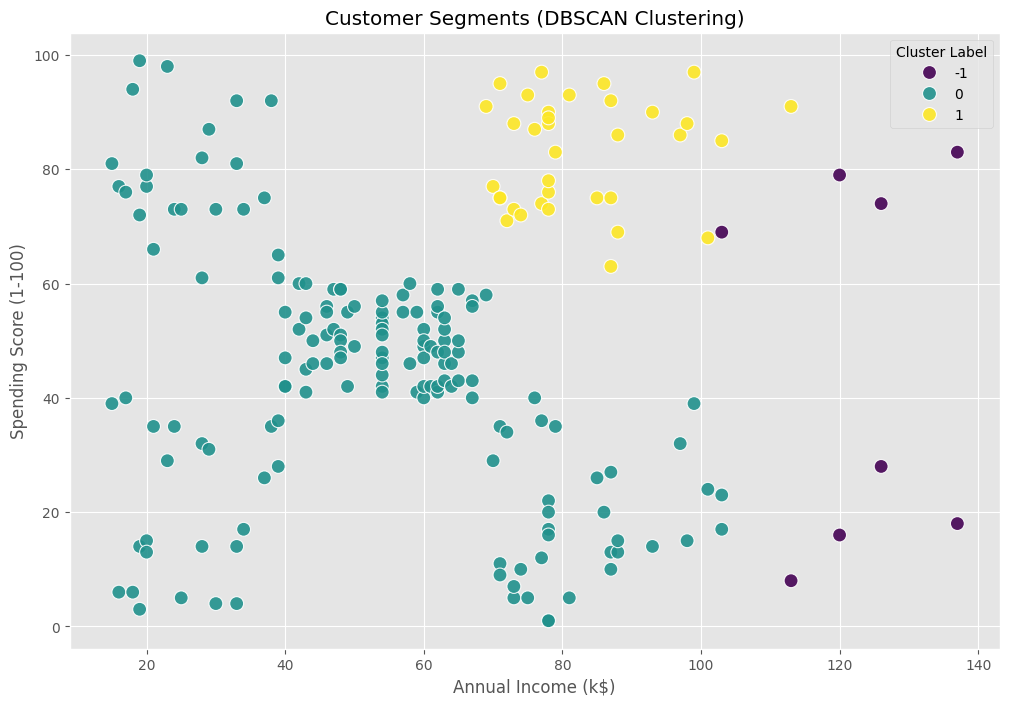

In [8]:
from sklearn.cluster import DBSCAN

print("--- Applying DBSCAN Clustering ---")

dbscan = DBSCAN(eps=0.5, min_samples=5)

y_dbscan = dbscan.fit_predict(X_scaled)

num_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
num_noise = list(y_dbscan).count(-1)

print(f"DBSCAN found {num_clusters} clusters.")
print(f"It also identified {num_noise} noise points (labeled as -1).")


plt.figure(figsize=(12, 8))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_dbscan, palette='viridis', s=100, alpha=0.9, legend='full')

plt.title(f'Customer Segments (DBSCAN Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label')
plt.grid(True)
plt.show()